In [49]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [50]:
from scipy.stats import rv_discrete  

values = np.array([1,2,3,4,5])

probabilities = [0.05, 0.3, 0.3, 0.05, 0.3]
distrib = rv_discrete(values=(range(len(values)), probabilities))  # This defines a Scipy probability distribution

In [51]:
g1 = np.array( [[1,2,3,4,6],[2,4,2,4,4],[3,5,5,1,2]])

max_k = np.argmax((probabilities*g1).sum(axis=1))
B=5

In [52]:
#successive elimination

def CUCB(K,T):

    
    phihat = np.zeros((K,K))
    avgreward = np.zeros(K)
    n = np.zeros(K)
    ik = np.ones(K)*10**14
    cumregret = []
    reward = []
    t = 0
        
    
    def pr(l,k,r):
        #print(l,k,r)
        ids = np.where(k==r)[0]
        
        return np.max(l[ids])
    
    
    while t < T:
        t+=1
        kmax = np.argmax(n)
        set_a = np.ones(len(n))
        set_a[kmax] = 0
        set_emp = np.where(set_a==1)[0]
        for i in range(len(set_emp)):
            if avgreward[kmax] > phihat[set_emp[i],kmax]:
                #print(True)
                set_a[set_emp[i]] = 0

        set_a[kmax] = 1
        tmp = np.where(set_a==1)[0]
        #print(tmp)
        #print(ik[tmp])
        kt = tmp[np.argmax(ik[tmp])]
        #print(kt)
        xt = distrib.rvs()
        rt = g1[kt,xt]
        
        cumregret.append(np.max(g1[max_k,xt]) - rt)
        #reward.append(rt)
        n[kt] +=1
        
        avgreward[kt] = (avgreward[kt]*(n[kt] - 1) + rt)/n[kt]
        ik[kt] = avgreward[kt] + B*np.sqrt(2*np.log(t)/n[kt])
        
        
        set_a = np.ones(len(n))
        set_a[kt] = 0
        set_emp = np.where(set_a==1)[0]
        for i in range(len(set_emp)):
            temp_val = pr(g1[set_emp[i],:],g1[kt,:],rt)
            #print(temp_val)
            phihat[set_emp[i],kt] = (phihat[set_emp[i],kt]*(n[kt]-1) + temp_val)/n[kt]
   
    return cumregret

In [53]:
def UCB1(K,T):

    reward = np.zeros(K)
    avgreward = np.zeros(K)
    n = np.zeros(K)
    cumreward = []
    cumregret = []
    t = 0
    for i in range(K):
        xt = distrib.rvs()
        r = g1[i,xt]
        cumreward.append(r)
        cumregret.append(g1[max_k,xt]-r)
        #reward[i] += r
        n[i] +=1
        avgreward[i] =(avgreward[i]*(n[i] - 1) + r)/n[i]
        t+=1
    #print(reward,n)  
    while t < T:
        
        UCBS = avgreward + B*np.sqrt(2*np.log(t)/n)
        id_max = np.argmax(UCBS)
        
        xt = distrib.rvs()
        r = g1[id_max,xt]
        

        #cumreward.append(r)
        cumregret.append(g1[max_k,xt]-r)
        
        reward[id_max] += r
        n[id_max] +=1
        avgreward[id_max] =(avgreward[id_max]*(n[id_max] - 1) + r)/n[id_max]
        
        
        t+=1
        
        
    return cumregret

In [55]:
newalg =[]
oldalg = []
for iterations in range(5):
    newalg.append(CUCB(3,5*10**4))
    oldalg.append(UCB1(3,5*10**4))

In [56]:
xn = np.zeros((5,50000))
xo = np.zeros((5,50000))

In [57]:
for i in range(5):
    xn[i,:] = np.cumsum(newalg[i])
    xo[i,:] = np.cumsum(oldalg[i])

In [58]:
xn =xn.mean(axis=0)
xo = xo.mean(axis=0)

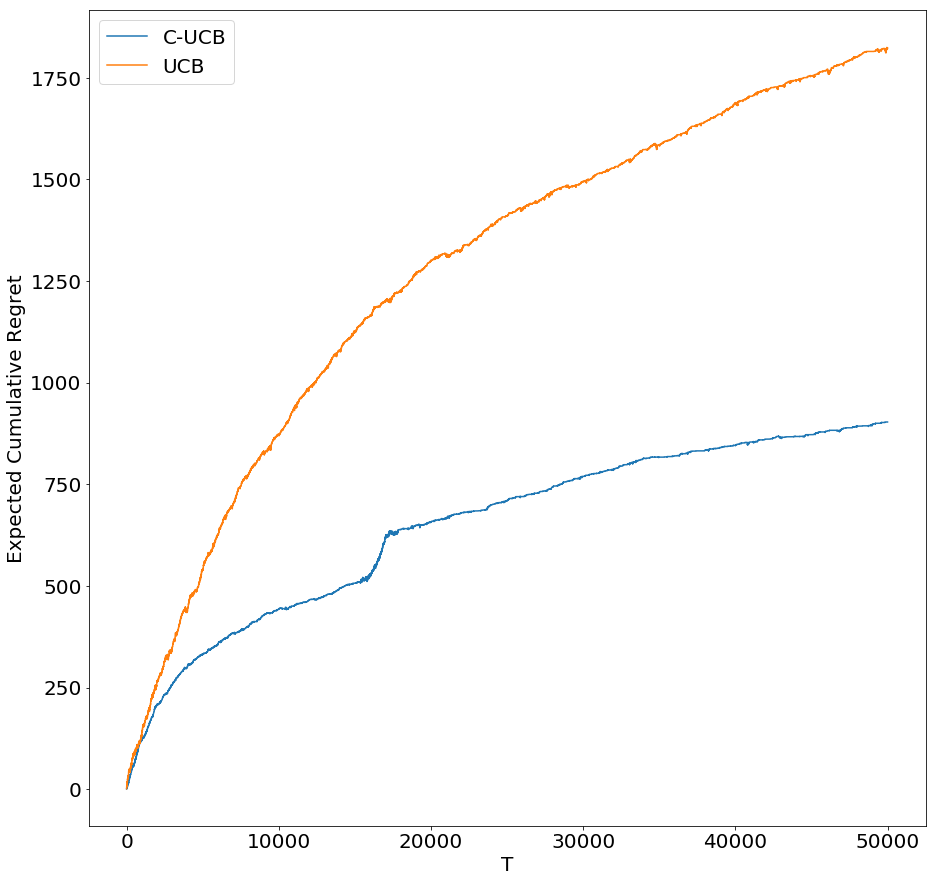

In [59]:
plt.figure(figsize=(15,15))
xplot = np.arange(1,len(xn)+1)
nc = np.cumsum(new)
no = np.cumsum(old)
plt.plot(xplot,xn,label='C-UCB')
plt.plot(xplot,xo,label='UCB')
fs = 20    
plt.legend(fontsize=fs)

plt.xticks(fontsize=fs)
plt.xlabel("T",fontsize=fs)
plt.ylabel('Expected Cumulative Regret',fontsize=fs)
plt.yticks(fontsize=fs)
plt.savefig('figcucb2.pdf',bbox_inches='tight')